# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Carregando o dataset

#### Importar o dataset

In [37]:
df = pd.read_csv("C:\DSA-Python-Fundamentos\Cap13 - Projeto 2\dados\dataset.csv")

#### Checar tamanho do arquivo

In [38]:
df.shape

(9700, 11)

#### Conhecer o dataset

In [39]:
df.head(10)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
5,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,FUR-FU-10001487,Furniture,Furnishings,48.8600
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.2800
7,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,TEC-PH-10002275,Technology,Phones,907.1520
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.5040
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.9000


In [40]:
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

#### Encontrar valores nulos

In [41]:
df.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

#### Encontrar valores duplicados

In [42]:
df.duplicated().sum()

0

#### Entender a distribuição estatística do dataset

In [43]:
df.describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


Ponto de atenção: Média muito distante da mediana. Basta olhar para os valores de máximo e mínimo para entendermos que há discrepância nos valores de Valor_Venda.

#### Checar se as colunas estão com o tipo adequado de dados

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


# Pergunta de Negócio 1:

Qual cidade com maior valor de venda de produtos da categoria 'Office Supplies'?

In [45]:
# Filtrar o dataframe com a categoria que gostariamos
df1 = df[df['Categoria'] == 'Office Supplies']

In [46]:
# Agrupar a venda por cidade
venda_cidade = df1.groupby('Cidade')['Valor_Venda'].sum()

In [47]:
# Encontrar cidade com maior valor de venda
cidade_venda_max = venda_cidade.idxmax()
print("Cidade com maior valor de venda para Office Supplies:", cidade_venda_max)

Cidade com maior valor de venda para Office Supplies: New York City


# Pergunta de Negócio 2:

Qual o total de vendas por data do pedido? Demonstre o resultado através de um gráfico de barras.

In [48]:
# Calcular o total de vendas para cada data de pedido

df2 = df.groupby('Data_Pedido')['Valor_Venda'].sum()
df2.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

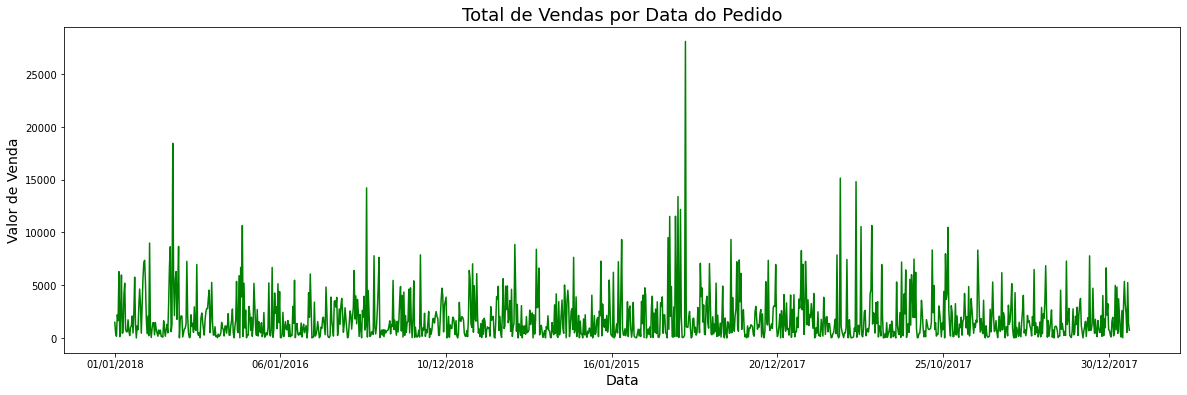

In [49]:
# Plotar o resusltado
plt.figure(figsize=(20,6))
df2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas por Data do Pedido', fontsize=18)
plt.xlabel('Data',fontsize=14)
plt.ylabel('Valor de Venda',fontsize=14)
plt.show()


# Pergunta de Negócio 3:
Qual o total de vendas por estado? Demonstre o resultado através de um gráfico de barras.

In [50]:
# Calcular o total de vendas para cada estado

df3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
df3.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


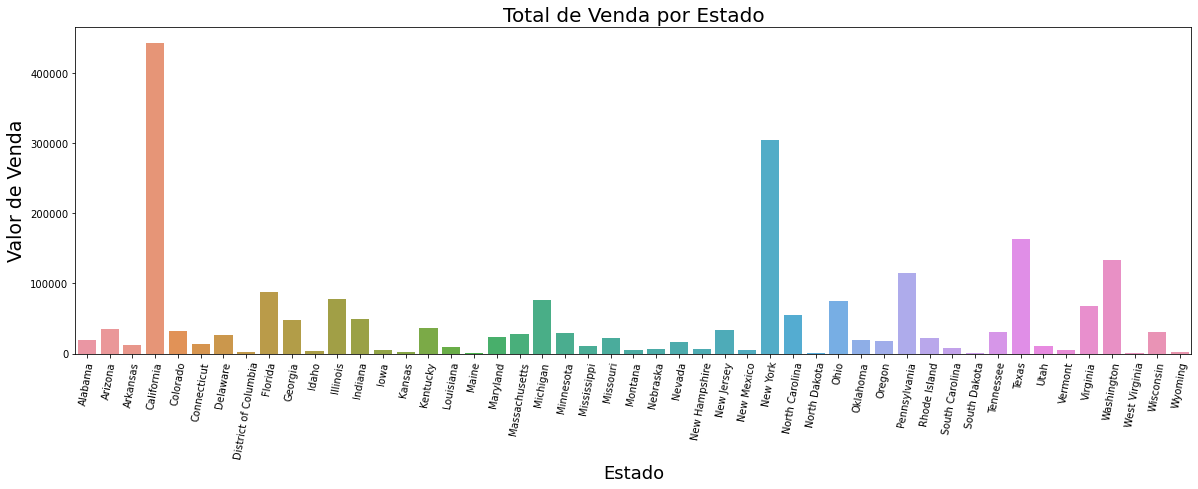

In [51]:
# Plotar o resultado
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Estado', y='Valor_Venda', data=df3)
plt.title('Total de Venda por Estado', fontsize=20)
ax.set_xlabel('Estado', fontsize=18)
ax.set_ylabel('Valor de Venda', fontsize=19)
plt.xticks(rotation = 80)

plt.show()

# Pergunta de Negócio 4:
Quais são as 10 cidades com maior total de vendas? Demonstre o resultado através de um gráfico de barras.

In [52]:
# Total de venda por cidade
df4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().nlargest(10, 'Valor_Venda')

df4

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


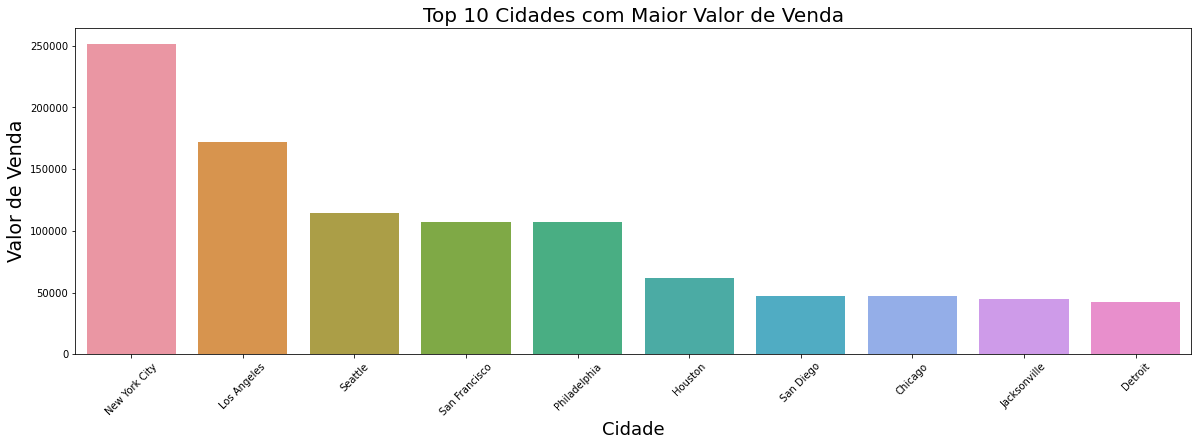

In [53]:
# Plotar o resultado
fig, ax = plt.subplots(figsize=(20,6))
sns.set_palette('coolwarm')
sns.barplot(x='Cidade', y='Valor_Venda', data=df4)
plt.title('Top 10 Cidades com Maior Valor de Venda', fontsize=20)
ax.set_xlabel('Cidade', fontsize=18)
ax.set_ylabel('Valor de Venda', fontsize=19)
plt.xticks(rotation = 45)

plt.show()

In [54]:
# Versão alternativa

# Total de venda por cidade
df4 = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

print(df4)

            Cidade  Valor_Venda
327  New York City  251749.2190
265    Los Angeles  171654.6330
450        Seattle  114725.4780
436  San Francisco  107489.9520
372   Philadelphia  107197.8030
207        Houston   61590.1868
435      San Diego   47458.3790
80         Chicago   46974.3430
216   Jacksonville   44713.1830
123        Detroit   42446.9440


# Pergunta de Negócio 5:
Qual segmento teve o maior total de vendas? Demonstre o resultado através de um gráfico de pizza.

In [55]:
# Somar o total de vendas por segmento

df5 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()

df5

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


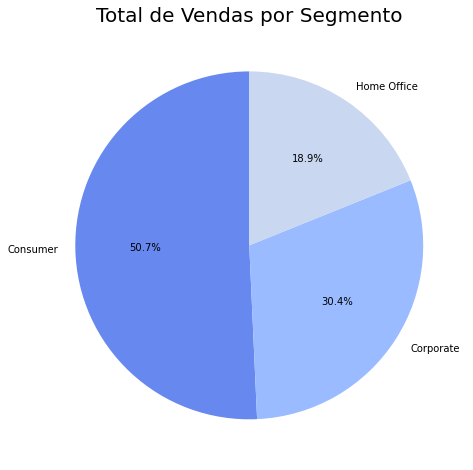

In [56]:
# Plotar o resultado

plt.figure(figsize = (8, 8))
plt.pie(df5['Valor_Venda'], 
        labels = df5['Segmento'], 
        autopct = '%1.1f%%', 
        startangle = 90)


plt.title('Total de Vendas por Segmento', fontsize=20)

plt.show()


# Pergunta de Negócio 6 (Desafio Nível Baby):
Qual o Total de Vendas Por Segmento e Por Ano?

In [57]:
# Converter a coluna Data_Pedido para o tipo datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [58]:
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [59]:
# Criar a variável ano

df['Ano'] = df['Data_Pedido'].dt.year

df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017


In [60]:
# Calcular o resultado

df6 = df.groupby(['Ano','Segmento'])['Valor_Venda'].sum().reset_index()

In [61]:
df6

,Ano,Segmento,Valor_Venda
0,2015,Consumer,256719.9166
1,2015,Corporate,125819.5957
2,2015,Home Office,88229.0878
3,2016,Consumer,265295.2593
4,2016,Corporate,114643.1229
5,2016,Home Office,74134.1332
6,2017,Consumer,288459.5572
7,2017,Corporate,203266.7398
8,2017,Home Office,103639.6270
9,2018,Consumer,323359.6019


# Pergunta de Negócio 7 (Desafio Nível Júnior):
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

In [62]:
# Filtrar as vendas com valor maior que 1000.

df7 = df[ df['Valor_Venda'] > 1000 ]

df7

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017


In [63]:
vendas_1000 = df7['ID_Pedido'].count()

print(vendas_1000)

457


In [64]:
# Outra opção de solução criando uma nova coluna

df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)

df.head()

df['Desconto'].value_counts()

0.10    9243
0.15     457
Name: Desconto, dtype: int64

# Pergunta de Negócio 8 (Desafio Nível Master):
Considere que a empresa decida conceder o desconto de 15% do item anterior. Qual seria a média do valor de venda antes e depois do desconto?

In [65]:
# Criar coluna com valor de venda com desconto e filtrar as vendas de 1000 reais

df['Valor_Venda_Final'] = df['Valor_Venda'] * (1 - df['Desconto'])

df8 = df[ df['Valor_Venda'] > 1000 ]

df8

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Final
10,CA-2015-115812,2015-06-09,BH-11710,Consumer,United States,Los Angeles,California,FUR-TA-10001539,Furniture,Tables,1706.184,2015,0.15,1450.2564
24,CA-2016-106320,2016-09-25,EB-13870,Consumer,United States,Orem,Utah,FUR-TA-10000577,Furniture,Tables,1044.630,2016,0.15,887.9355
27,US-2016-150630,2016-09-17,TB-21520,Consumer,United States,Philadelphia,Pennsylvania,FUR-BO-10004834,Furniture,Bookcases,3083.430,2016,0.15,2620.9155
35,CA-2017-117590,2017-12-08,GH-14485,Corporate,United States,Richardson,Texas,TEC-PH-10004977,Technology,Phones,1097.544,2017,0.15,932.9124
54,CA-2017-105816,2017-12-11,JM-15265,Corporate,United States,New York City,New York,TEC-PH-10002447,Technology,Phones,1029.950,2017,0.15,875.4575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9632,CA-2015-151330,2015-10-14,TC-21295,Consumer,United States,Everett,Massachusetts,FUR-CH-10000749,Furniture,Chairs,1628.820,2015,0.15,1384.4970
9636,CA-2016-116638,2016-01-28,JH-15985,Consumer,United States,Concord,North Carolina,FUR-TA-10000198,Furniture,Tables,4297.644,2016,0.15,3652.9974
9646,CA-2017-107104,2017-11-26,MS-17365,Consumer,United States,Los Angeles,California,FUR-BO-10002213,Furniture,Bookcases,3406.664,2017,0.15,2895.6644
9657,CA-2017-160717,2017-06-06,ME-17320,Home Office,United States,Santa Barbara,California,TEC-PH-10001459,Technology,Phones,3023.928,2017,0.15,2570.3388


In [66]:
# Calcular a média

media_antes = df8['Valor_Venda'].mean()

media_depois = df8['Valor_Venda_Final'].mean()


print('A média do valor de venda antes é de', round(media_antes,2))
print('A média do valor de venda antes é de', round(media_depois,2))


A média do valor de venda antes é de 2116.81
A média do valor de venda antes é de 1799.29


# Pergunta de Negócio 9 (Desafio Nível Master Ninja):
Qual a média de vendas por segmento, por ano e por mês? Demonstre o resultado através de gráfico de linha.

In [71]:
# Extrair o mês para uma nova variável

df['Mes'] = df['Data_Pedido'].dt.month

df9 = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])

In [72]:
df9

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [70]:
# Extrair os níveis

anos = df9.index.get_level_values(0)
mes = df9.index.get_level_values(1)
segmentos = df9.index.get_level_values(2)

<Figure size 864x432 with 0 Axes>

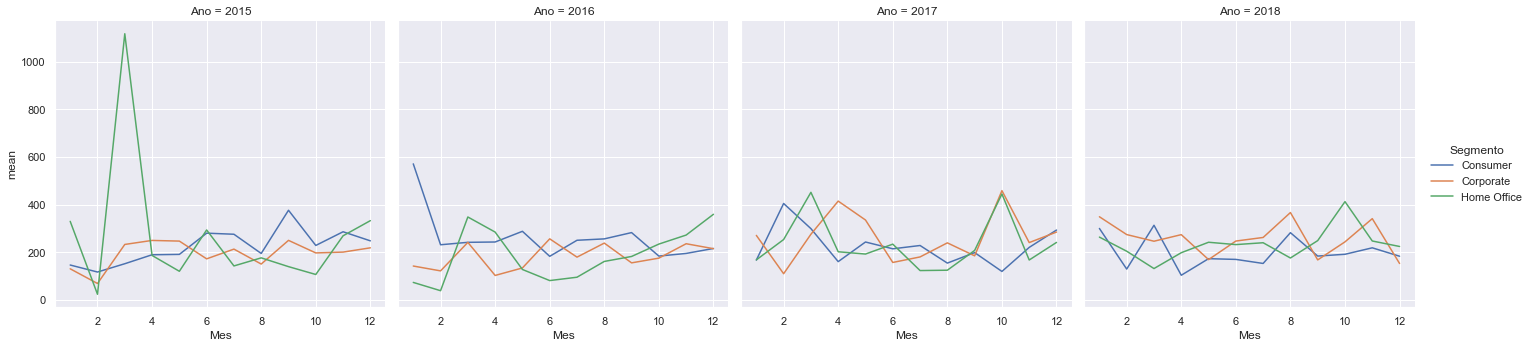

In [74]:
# Plotar os gráficos

plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                    data = df9,
                    y = 'mean',
                    x = mes,
                    hue = segmentos,
                    col = anos,
                    col_wrap = 4)
plt.show()

# Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
Qual o total de vendas por categoria e subcategoria, considerando somente as top 12 subcategorias?
Demonstre tudo através de um único gráfico.